# PG#5 K-평균 군집화

In [69]:
#실습전 설정

import sys
assert sys.version_info >= (3,5)

import sklearn 
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
 
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Iris 데이터셋 중 꽃잎 길이, 너비 특성만 사용합니다. (2, 3번째 특성)

In [70]:
from sklearn.datasets import load_iris

iris=load_iris()
X = iris["data"][:,(2,3)]
y = iris.target

In [71]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c='#FFACB7')
    plt.xlabel("petal length", fontsize=14)
    plt.ylabel("petal width", fontsize=14)
    plt.title("feature scatter", fontsize=18)

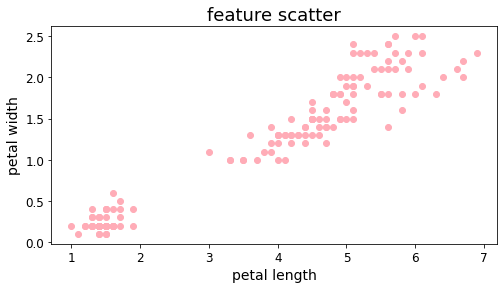

In [72]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [73]:
from sklearn.cluster import KMeans

### K = 2 인 경우,

In [74]:
k=2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [75]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [76]:
y_pred is kmeans.labels_

True

In [77]:
kmeans.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [78]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [79]:
def plot_data(X):
    plt.plot(X[:,0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids=centroids[weights>weights.max()/10]
    plt.scatter(centroids[:,0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:, 1],
               marker='x', s=35, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

In [80]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx,yy=np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                     np.linspace(mins[1], maxs[1], resolution))
    Z=clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

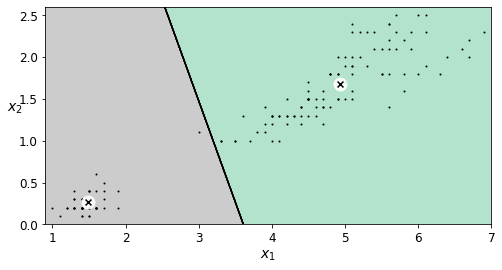

In [81]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

plt.show()

### K = 3 인 경우,

In [82]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [83]:
y_pred is kmeans.labels_

True

In [84]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [85]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

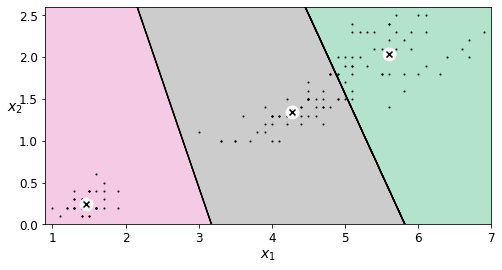

In [86]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

plt.show()

### K = 4 인 경우,

In [87]:
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [88]:
y_pred is kmeans.labels_

True

In [89]:
kmeans.cluster_centers_

array([[5.78611111, 2.10833333],
       [1.462     , 0.246     ],
       [4.75789474, 1.59736842],
       [3.90384615, 1.19230769]])

In [90]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

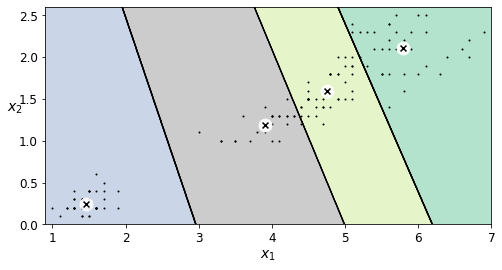

In [91]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

plt.show()

### K = 5 인 경우,

In [92]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [93]:
y_pred is kmeans.labels_

True

In [94]:
kmeans.cluster_centers_

array([[4.64857143, 1.5       ],
       [1.462     , 0.246     ],
       [5.39666667, 2.05333333],
       [3.83181818, 1.16818182],
       [6.28461538, 2.13846154]])

In [95]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 2, 4, 2, 2, 4, 0, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 0, 2, 2, 4, 0, 2, 4, 0, 0, 2, 2, 4, 4,
       2, 0, 2, 4, 2, 2, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int32)

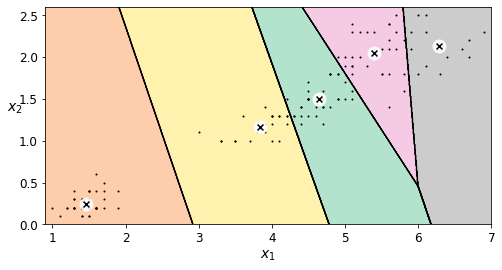

In [96]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

plt.show()

### -> K값을 2~5까지 수행하여 눈으로 확인하였을 때는 2와 3이 가장 적절해 보인다

# 최적의 클러스터 개수 찾기

In [97]:
def plot_clusterer_comparision(clusterer1, clusterer2,X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

### K값이 2와 3일때 비교

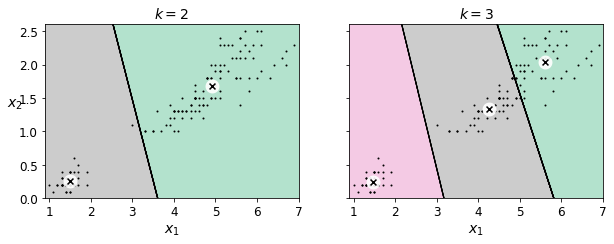

In [98]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k3=KMeans(n_clusters=3, random_state=42)

plot_clusterer_comparision(kmeans_k2, kmeans_k3, X, "$k=2$", "$k=3$")

plt.show()

In [99]:
kmeans_k2.inertia_

86.39021984551397

In [100]:
kmeans_k3.inertia_ 

31.37135897435897

#### 당연히 K가 3일때 이니셔 값이 더 작게 나오기 때문에 K값을 정할 수 없다.

### 최적의 K값은 실루엣 점수로 판단

In [101]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
               for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [102]:
from sklearn.metrics import silhouette_score

In [103]:
silhouette_score(X, kmeans.labels_)

0.5883732712110276

In [104]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

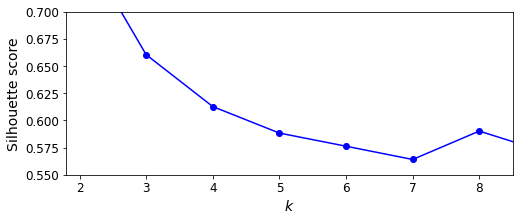

In [105]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

### 실루엣 점수가 2에서 가장 높고, 3이 다음으로 높은 것을 보아 K값이 2일때와 3일때가 적합한 것으로 보인다

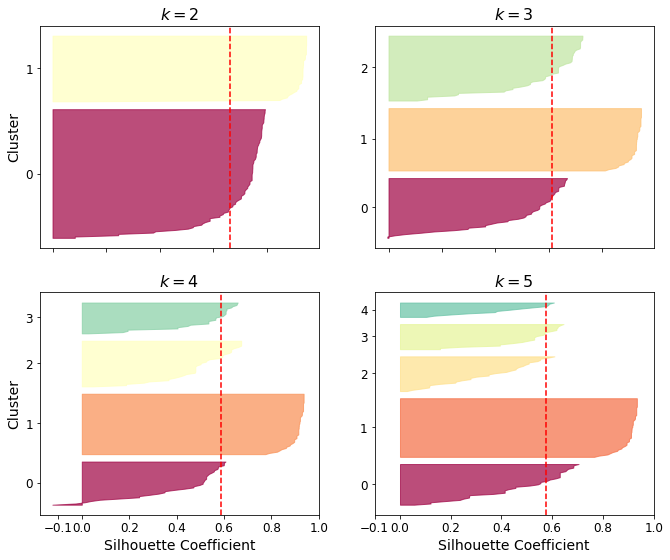

In [106]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11,9))
 
for k in (2,3,4,5):
  plt.subplot(2,2,k-1)

  y_pred = kmeans_per_k[k-1].labels_
  silhouette_coefficients = silhouette_samples(X, y_pred)

  padding =len(X) // 30
  pos = padding
  ticks = []
  for i in range(k):
    coeffs = silhouette_coefficients[y_pred == i]
    coeffs.sort()

    color = mpl.cm.Spectral(i/k)
    plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, 
                      facecolor=color, edgecolor=color, alpha=0.7)
    ticks.append(pos + len(coeffs) // 2)
    pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (2,4):
    plt.ylabel("Cluster")
  if k in (4,5):
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

  else:
    plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
  plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### 실루엣 점수를 그림으로 나타내었을 때도 K가 2일때와 3일때 모두 실루엣 계수를 넘은 것을 확인 할 수 있다.
### 하지만 K가 3일 때 데이터의 갯수가 동일 비율로 나뉘어져 있는 것을 확인 할 수 있다.
## 따라서 최적의 K값은 3이다. 